In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Resources/cardio_train.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
df=df.drop('id', axis=1)

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
# combining height and weight into 1 -- BMI
df['bmi'] = round(df.weight/df.height * 100, 2)

In [6]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,44.52
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,43.56
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,42.42
3,14549,2,165,85.0,120,80,1,1,1,1,1,0,51.52
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,40.00


In [7]:
df=df.drop(columns =['height', 'weight']) 

In [8]:
df.age = df.age.apply(lambda x: x / 365)

In [9]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,61.558904,1,130,80,2,2,0,0,1,0,44.52
1,40.131507,1,110,70,1,1,0,0,1,1,43.56
2,60.002740,1,120,80,1,1,0,0,1,0,42.42
3,39.860274,2,120,80,1,1,1,1,1,0,51.52
4,64.090411,1,120,80,1,1,0,0,1,0,40.00


In [10]:
df = df[['age','gender','bmi','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]

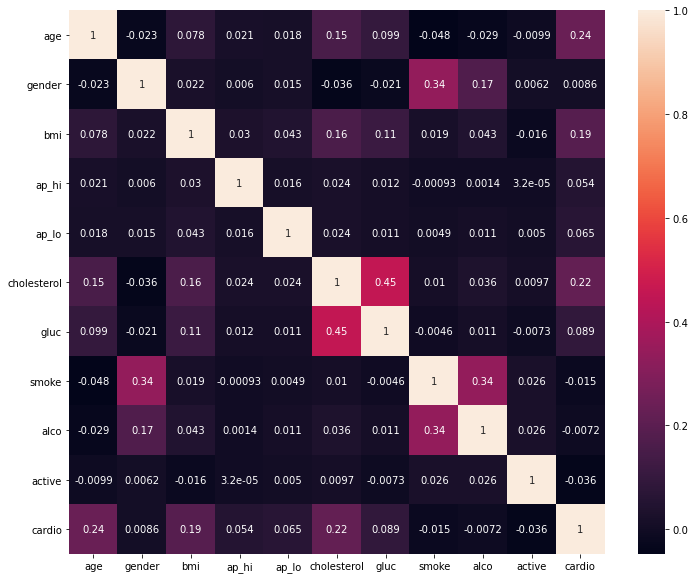

In [11]:
# Visualizing different attributes
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(),annot=True);

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [13]:
# Assign X (data) and y (target)
X = df.drop("cardio", axis=1)
y = df["cardio"]
print(X.shape, y.shape)

(69301, 10) (69301,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
#Creating the model
logisticRegr = LogisticRegression(C=1)
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

/opt/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
#Saving the Model
pickle_out = open("logisticRegr.pkl", "wb") 
pickle.dump(logisticRegr, pickle_out) 
pickle_out.close()

In [17]:
classifier = LogisticRegression(max_iter=1000)
classifier

LogisticRegression(max_iter=1000)

In [18]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7184415584415584
Testing Data Score: 0.7203624610412097


In [20]:
df.describe()

,age,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.339140,1.349519,45.144134,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.759621,0.476821,8.568168,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,29.583562,1.000000,6.060000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,39.390000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,43.640000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.427397,2.000000,49.680000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,224.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000
